# WS 12 08-04-2025

> Name: Rishi Vora
>
> Roll No: MS21113

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

## Q1. Write a class to parse the GenBank formatted file with methods to extract following information:

In [8]:
class GenBankParser:
    def __init__(self, filepath):
        self.filepath = filepath
        self.content = self._read_file()


    def _read_file(self):
        try:
            with open(self.filepath, 'r') as file:
                return file.read()
        except FileNotFoundError:
            raise FileNotFoundError(f"The file {self.filepath} does not exist.")

    # Q1 (a) - Gene name
    def get_gene_name(self):
        """Extracts the gene name from the FEATURES section."""

        match = re.search(r'gene\s+(?:.|\n)*/gene="(\w+)"', self.content, re.MULTILINE)
        return match.group(1)

    # Q1 (a) - Organism name
    def get_organism_name(self):
        """Extracts the organism name from the SOURCE section."""

        match = re.search(r'SOURCE\s+(.+)', self.content)
        return match.group(1).strip() if match else None

    # Q1 (a) - Chromosome number
    def get_chromosome_number(self):
        """Extracts the chromosome number from the FEATURES section."""

        match = re.search(r'/chromosome="(\d+)"', self.content)
        return match.group(1) if match else None

    # Q1 (b) - Cross-references of gene with other database
    def get_gene_cross_references(self):
        """Extracts cross-references of the gene with other databases."""

        matches = re.findall(r'/db_xref="(.*?)"', self.content)
        return matches if matches else None

    # Q1 (c) - Number of mRNA sequences with their respective identifiers and number of exons (Keyword is mRNA)
    def get_mrna_sequences(self):
        """Extracts the number of mRNA sequences, their identifiers, and the number of exons."""

        matches = re.findall(r'mRNA\s+join\((.*?)\).*?/db_xref="(.*?)"', self.content, re.DOTALL) # re.DOTALL allows including \n
        mrna_data = []
        for match in matches:
            exons = match[0].split(',')
            identifier = match[1]
            mrna_data.append({
                'identifier': identifier,
                'number_of_exons': len(exons)
            })

        return {
            'number_of_mRNA_sequences': len(mrna_data),
            'mRNA': mrna_data
        }

    # Q1 (d) - Given an identifier extract the transcript sequence.
    def get_transcript_sequence(self, identifier):
        """Extracts the transcript sequence for a given identifier."""

        match = re.search(rf'mRNA\s+join\(((?:.|\n)*?)\)(?:.|\n)*?/db_xref="{identifier}"', self.content)
        if not match:
            return None

        match = re.sub(r'\s', '', match.group(1))
        ranges = match.split(',')
        sequence = ''

        origin_match = re.search(r'ORIGIN[\s\S]+$', self.content, re.MULTILINE)
        if origin_match:
            origin_sequence = re.sub(r'[^a-zA-Z]', '', origin_match.group(0))
            origin_sequence = re.sub(r'ORIGIN', '', origin_sequence)
            for range_ in ranges:
                start, end = map(int, range_.split('..'))
                sequence += origin_sequence[start - 1:end]

        return sequence

    # Q1 (e) - Number of protein sequences with their respective identifiers
    def get_protein_sequences(self):
        """Extracts the number of protein sequences and their respective identifiers."""

        matches = re.findall(r'CDS\s+join\((.*?)\).*?/db_xref="(.*?)"', self.content, re.DOTALL)
        protein_data = []
        for match in matches:
            protein_data.append({'identifier': match[1]})

        return {
            'number_of_proteins': len(protein_data),
            'proteins': protein_data
        }

    # Q1 (f) - Given an identifier extract the protein sequence. (Keyword is CDS)
    def get_protein_sequence(self, identifier):
        """Extracts the protein sequence for a given identifier (Keyword: CDS)."""

        match = re.search(rf'CDS\s+join\((.*?)\).*?/db_xref="{identifier}"', self.content, re.DOTALL)
        if not match:
            return None

        match = re.sub(r'\s', '', match.group(1))
        ranges = match.split(',')
        sequence = ''

        origin_match = re.search(r'ORIGIN[\s\S]+$', self.content, re.MULTILINE)
        if origin_match:
            origin_sequence = re.sub(r'[^a-zA-Z]', '', origin_match.group(0))
            origin_sequence = re.sub(r'ORIGIN', '', origin_sequence)
            for range_ in ranges:
                start, end = map(int, range_.split('..'))
                sequence += origin_sequence[start - 1:end]

        return sequence

In [9]:
gb = GenBankParser("assignments/ptenSequence.gb")

In [10]:
gb.get_gene_name()

'PTEN'

In [11]:
gb.get_organism_name()

'Homo sapiens (human)'

In [12]:
gb.get_chromosome_number()

'10'

In [13]:
gb.get_gene_cross_references()

['taxon:9606',
 'GeneID:130004273',
 'GeneID:130004273',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'Ensembl:ENST00000371953.8',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'GeneID:130004274',
 'GeneID:130004274',
 'GI:1520682132',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'GI:73765544',
 'CCDS:CCDS31238.1',
 'Ensembl:ENSP00000361021.3',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728',
 'GeneID:130004275',
 'GeneID:130004275',
 'GeneID:100271271',
 'HGNC:HGNC:36342',
 'GeneID:100271271',
 'GI:754502064',
 'GeneID:5728',
 'HGNC:HGNC:9588',
 'MIM:601728']

In [14]:
gb.get_mrna_sequences()

{'number_of_mRNA_sequences': 3,
 'mRNA': [{'identifier': 'GeneID:5728', 'number_of_exons': 9},
  {'identifier': 'Ensembl:ENST00000371953.8', 'number_of_exons': 9},
  {'identifier': 'GeneID:5728', 'number_of_exons': 9}]}

In [15]:
gb.get_transcript_sequence(gb.get_mrna_sequences()["mRNA"][0]["identifier"])

'gttctctcctctcggaagctgcagccatgatggaagtttgagagttgagccgctgtgaggcgaggccgggctcaggcgagggagatgagagacggcggcggccgcggcccggagcccctctcagcgcctgtgagcagccgcgggggcagcgccctcggggagccggccggcctgcggcggcggcagcggcggcgtttctcgcctcctcttcgtcttttctaaccgtgcagcctcttcctcggcttctcctgaaagggaaggtggaagccgtgggctcgggcgggagccggctgaggcgcggcggcggcggcggcacctcccgctcctggagcgggggggagaagcggcggcggcggcggccgcggcggctgcagctccagggagggggtctgagtcgcctgtcaccatttccagggctgggaacgccggagagttggtctctccccttctactgcctccaacacggcggcggcggcggctggcacatccagggacccgggccggttttaaacctcccgtgcgccgccgccgcaccccccgtggcccgggctccggaggccgccggcggaggcagccgttcggaggattattcgtcttctccccattccgctgccgccgctgccaggcctctggctgctgaggagaagcaggcccagtcgctgcaaccatccagcagccgccgcagcagccattacccggctgcggtccagagccaagcggcggcagagcgaggggcatcagctaccgccaagtccagagccatttccatcctgcagaagaagccccgccaccagcagcttctgccatctctctcctcctttttcttcagccacaggctcccagacatgacagccatcatcaaagagatcgttagcagaaacaaaaggagatatcaagaggatggattcgacttagacttgacctatatttatccaaacattattgctatgggatttcctgcagaaagacttgaaggcgtatacaggaacaatattgatg

In [16]:
gb.get_protein_sequences()

{'number_of_proteins': 3,
 'proteins': [{'identifier': 'GI:1520682132'},
  {'identifier': 'GI:73765544'},
  {'identifier': 'GI:754502064'}]}

In [17]:
gb.get_protein_sequence(gb.get_protein_sequences()["proteins"][0]["identifier"])

'ctggagcgggggggagaagcggcggcggcggcggccgcggcggctgcagctccagggagggggtctgagtcgcctgtcaccatttccagggctgggaacgccggagagttggtctctccccttctactgcctccaacacggcggcggcggcggctggcacatccagggacccgggccggttttaaacctcccgtgcgccgccgccgcaccccccgtggcccgggctccggaggccgccggcggaggcagccgttcggaggattattcgtcttctccccattccgctgccgccgctgccaggcctctggctgctgaggagaagcaggcccagtcgctgcaaccatccagcagccgccgcagcagccattacccggctgcggtccagagccaagcggcggcagagcgaggggcatcagctaccgccaagtccagagccatttccatcctgcagaagaagccccgccaccagcagcttctgccatctctctcctcctttttcttcagccacaggctcccagacatgacagccatcatcaaagagatcgttagcagaaacaaaaggagatatcaagaggatggattcgacttagacttgacctatatttatccaaacattattgctatgggatttcctgcagaaagacttgaaggcgtatacaggaacaatattgatgatgtagtaaggtttttggattcaaagcataaaaaccattacaagatatacaatctttgtgctgaaagacattatgacaccgccaaatttaattgcagagttgcacaatatccttttgaagaccataacccaccacagctagaacttatcaaacccttttgtgaagatcttgaccaatggctaagtgaagatgacaatcatgttgcagcaattcactgtaaagctggaaagggacgaactggtgtaatgatatgtgcatatttattacatcggggcaaatttttaaaggcacaagaggccctagatttctatggggaagtaaggac

## Q2. Write a program to perform k-means clustering on dummy 2-D data.

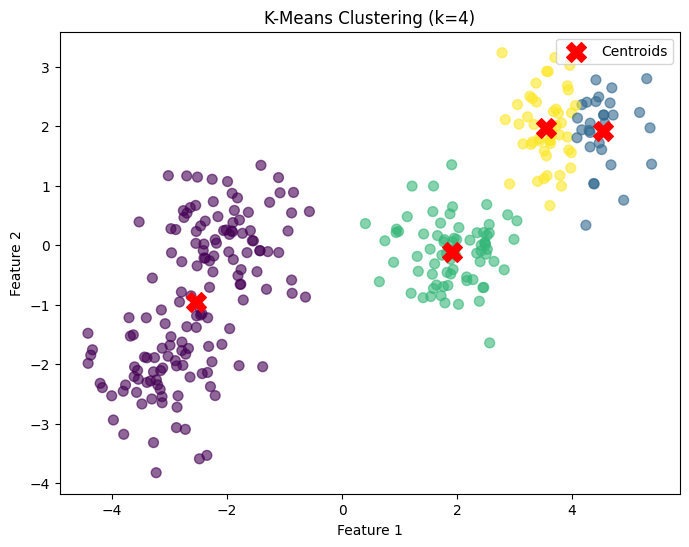

In [18]:
np.random.seed(0)
n_samples = 300
k = 4
cluster_std = 0.60
centers = np.array([[-2, 0], [4, 2], [2, 0], [-3, -2]])
X = np.vstack([center + cluster_std * np.random.randn(n_samples // k, 2) for center in centers])

def kmeans(X, k, max_iters=100):
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = []

        for j in range(k):
            points = X[labels == j]
            if len(points) == 0:
                new_centroids.append(X[np.random.choice(X.shape[0])])
            else:
                new_centroids.append(points.mean(axis=0))

        new_centroids = np.vstack(new_centroids)
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids
    return centroids, labels

centroids, labels = kmeans(X, k)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k={k})")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
